# Фильтр Калмана
## Одномерный случай
### Постановка задачи

Рассмотрим движение автомобиля по прямой

$$
x_{k+1} = x_{k} + v_k dt.
$$

С учетом неидеальноси модели:

$$
x_{k+1} = x_k + v_k dt + \xi_k.
$$

Пусть координата машины измеряется GPS-сенсором с погрешностью $\eta$:

$$
z_k = x_k + \eta_k
$$

Требуется как можно точнее вычислить положение машины на основе зашумденных показаний датчика

Перепишем уравнения в виде:

$$
\left\{
\begin{array}{l}
x_{k+1} = x_k + u_k + \xi_k\\
z_k = x_k + \eta_k
\end{array}
\right.
$$

- u_k — это известная величина, которая контролирует поведение системы.
- Ошибка модели $\xi_k$ и ошибка сенсора $\eta_k$ — случайные независимые величины. 
- Средние значения ошибок равны нулю.
- Сам закон распределения ошибок может быть нам и не известен, но известны их дисперсии.

### Алгоритм Калмана

Будем считать, что на $k$-м шаге мы имеем хорошую оценку координаты $\hat{x}_k$. Тогда на основании модели можно вычислить следующее предсказание $x_{k+1}=\hat{x}_k+u_k$. После перемещения имеем измерение $z_{k+1}$. Идея Калмана состоит в том, что чтобы получить наилучшее приближение к истинной координате, мы должны выбрать золотую середину между показанием  неточного сенсора и нашим предсказанием того, что мы ожидали от него увидеть. Показанию сенсора мы дадим вес $K$  а на предсказанное значение останется вес (K-1):

$$
\hat{x}_{k+1} = Kz_{k+1} + (1-K)(\hat{x}_k+u_k),
$$

где $K$ - коэффициент Калмана, который требуется найти.

Ошибка оценки:

$$
e_{k+1} = x_{k+1} - \hat{x}_{k+1} = (1-K)(e_k+\xi_k) - K\eta_{k+1}
$$

Для минимизации ошибки минимизируем матожидание ее квадрата $E(e^2(k_1)) \rightarrow \min$

$$
E(e^2_{k+1}) = (1-K)^2(E(e^2_k) + \sigma_\xi^2) + K^2\sigma_\eta^2
$$

Решая путем приравнивания производной к нулю:

$$
K_{k+1} = \frac{E(e^2_k) + \sigma_\xi^2}{E(e^2_{k}) + \sigma_\xi^2 +\sigma^2_\eta}
$$

Итого

- имеется система
$$
\left\{
\begin{array}{l}
x_{k+1} = x_k + u_k + \xi_k\\
z_k = x_k + \eta_k
\end{array}
\right.
$$
- Среднее значение квадрата ошибки
$$
E(e^2_{k+1}) = \frac{\sigma_\eta^2(E(e^2_k) + \sigma_\xi^2)}{E(e^2_k) + \sigma_\xi^2 +\sigma^2_\eta}
$$
- Коэффициент Калмана
$$
K_{k+1} = \frac{E(e^2_{k}) + \sigma_\xi^2}{E(e^2_k) + \sigma_\xi^2 +\sigma^2_\eta}
$$
- Оценка
$$
\hat{x}_{k+1} = Kz_{k+1} + (1-K)(\hat{x}_k+u_k),
$$
- Начальные условия
$$
\hat{x}_0 = z_0, E(e^2_0) = \sigma^2_\eta
$$


### Пример
$$
x_{t+1} = x_t + at dt + \xi(t)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

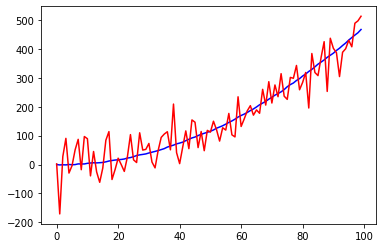

In [ ]:
N=100  
a=0.1 
sigmaXi=1
sigmaEta=50

k = range(N)
x = np.zeros(N)
z = np.zeros(N)
x[0] = 0
z[0] = x[0] + np.random.normal(0, sigmaXi)

for t in k[:-1]:
    x[t+1] = x[t] + a*t + np.random.normal(0, sigmaXi)
    z[t+1] = x[t+1]  + np.random.normal(0, sigmaEta)

plt.plot(k, x, c='b')
plt.plot(k, z, c='r')
plt.show()

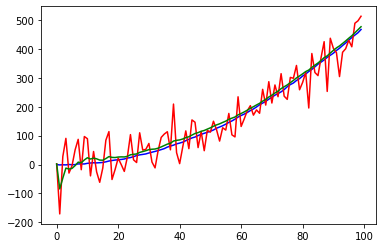

In [ ]:
x_hat = np.zeros(N)
e = np.zeros(N)
K = np.zeros(N)

x_hat[0] = z[0]
e[0] = sigmaEta

for t in k[:-1]:
    e[t+1] = np.sqrt((sigmaEta**2)*(e[t]**2+sigmaXi**2)/(sigmaEta**2+e[t]**2+sigmaXi**2))
    K[t+1] = e[t+1]**2 / (sigmaEta**2)
    x_hat[t+1] = (x_hat[t]+a*t)*(1-K[t+1])+K[t+1]*z[t+1]

plt.plot(k, x, c='b')
plt.plot(k, z, c='r')
plt.plot(k, x_hat, c='g')
plt.show()

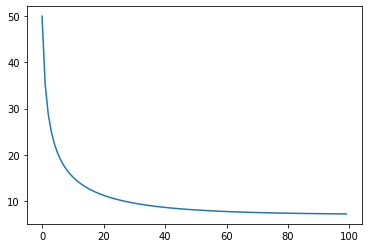

In [ ]:
plt.plot(k, e)
plt.show()

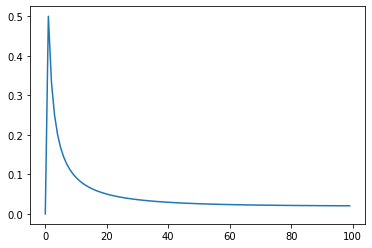

In [ ]:
plt.plot(k, K)

### Фильтр Калмана при отсутствии модели
Возьмем за модель
$$
x_{t+1} = x_t + \xi_t
$$

для объекта

$$
x_{t+1} = 20  \sin 0.05t + \xi_t
$$

и зададим K константой подбором

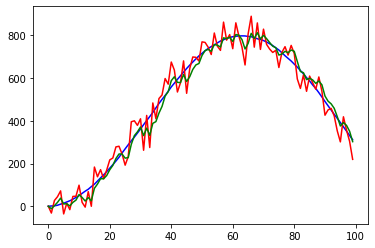

In [ ]:
N=100  
a=0.1 
sigmaXi=1
sigmaEta=50

k = range(N)
x = np.zeros(N)
z = np.zeros(N)
x[0] = 0
z[0] = x[0] + np.random.normal(0, sigmaXi)

for t in k[:-1]:
    x[t+1] = x[t] +20* np.sin(0.05*t) + np.random.normal(0, sigmaXi)
    z[t+1] = x[t+1]  + np.random.normal(0, sigmaEta)


x_hat = np.zeros(N)
e = np.zeros(N)
K = np.ones(N) * 0.37

x_hat[0] = z[0]
e[0] = sigmaEta

for t in k[:-1]:
    e[t+1] = np.sqrt((sigmaEta**2)*(e[t]**2+sigmaXi**2)/(sigmaEta**2+e[t]**2+sigmaXi**2))
    #K[t+1] = e[t+1]**2 / (sigmaEta**2)
    x_hat[t+1] = (x_hat[t])*(1-K[t+1])+K[t+1]*z[t+1]
    

plt.plot(k, x, c='b')
plt.plot(k, z, c='r')
plt.plot(k, x_hat, c='g')
plt.show()

## Многомерный случай

### Постановка задачи

Модель линейной системы:

$$
\left\{
    \begin{array}{l}
        x_t = Ax_{t-1} + Bu_t + \varepsilon_t\\
        z_t = Cx_t + \delta_t
    \end{array}
\right.
$$

- $x_t$ - состояние системы
- $z_t$ - показания датчиков
- $\varepsilon_t$, $\delta_t$ - возмущения с гаусовым распределением, нулевым матожиданием и матрицами ковариации $R_t$, $Q_t$, соответственно.

Требуется определить состояние системы $\hat{x}_t$ на основании модели и зашумленных измерений.

### Идея решения

Предсказание состояния системы:

$$
\bar{x}_t = Ax_{t-1} + Bu_t + \varepsilon_t
$$

Предсказание измерения датчика

$$
\bar{z}_t = C\bar{x}_t + \delta_t
$$

Оценка

$$
\hat{x}_t = \bar{x}_t + K(z_t - \bar{z}_t)
$$

### Фильтр Калмана

$$
\begin{array}{l}
Kalman\_filter(\hat{x}_{t-1}, \Sigma_{t-1}, u_t, z_t):\\
\quad \bar{x}_t = A\hat{x}_{t-1} + Bu_t\\
\quad \bar{\Sigma}_t = A\Sigma_{t-1}A^T_t + R_t\\
\\
\quad   K_t = \bar{\Sigma}_tC^T (C\bar{\Sigma}_tC^T + Q_t)^{-1}\\
\quad   \hat{x}(t) = \bar{x}_t + K_t(z_t - C\bar{x}_t)\\
\quad   \Sigma_t = (I - K_tC)\bar{\Sigma}_t\\
\quad   return \quad \hat{x}_t, \Sigma_t
\end{array}
$$

$\hat{x}_t$ - математическое ожидание вероятностной функции состояния с нормальным распределением, $\Sigma_t$ - ее ковариационная матрица, $R_t$ - матрица ковариации модели системы, $Q_t$ - матрица ковариации модели измерений.

### Калмановский ниндзя
 Перепел равноускоренно улетает, ниндзя должен вычислить его координату для точного удара

Уравнение движения перепела:

$$
p_t = p_{t-1} + v_{t-1}t +\frac{1}{2}a_t t^2
$$

- $p$ - его положение;
- $v$ = скорость;
- $a$ - ускорение.

Уравнение скорости:

$$
v_t = v_{t-1} + a_t t.
$$

Выберем вектор состояния:

$$
x_t = \left[
    \begin{array}{c}
        p_t\\
        v_t
    \end{array}

\right]
$$

Построим линейную динамическую модель

$$
x_t = \left[
    \begin{array}{c}
        p_t\\
        v_t
    \end{array}
\right] =

\left[
    \begin{array}{cc}
        1 & T\\
        0 & 1
    \end{array}
\right] 
\left[
    \begin{array}{c}
        p_{t-1}\\
        v_{t-1}
    \end{array}
\right] +
\left[
    \begin{array}{c}
        T^2/2\\
        T
    \end{array}
\right]a_t
$$

$$
x_t = Ax_{t-1} + Bu_t
$$

Модель измерений:

$$
z_t = C_tx_t = [1 \quad 0] \left[
    \begin{array}{c}
        p_t\\
        v_t
    \end{array}
\right]
$$

Обозначим среднеквадратические отклонения положения, скорости и измерений $\sigma_p$, $\sigma_v$, $\sigma_z$.

Тогда матрицы ковариации модели и измерений примут вид:

$$
E_x =\left[ \begin{array}{cc} 
        \sigma_p^2 & \sigma_p \sigma_v \\
        \sigma_p \sigma_v & \sigma_v^2
    \end{array}
\right]
$$

$$
E_z = \sigma_z^2
$$

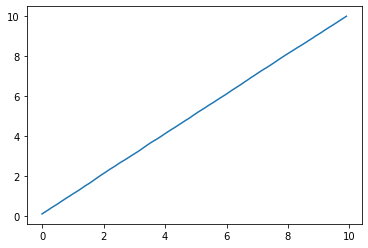

In [ ]:
duration = 10
dt = 0.1
u = 1
x = np.array([[0], [0]])


A = np.array([[1, dt], [0, 1]])
B = np.array([[dt**2], [dt]])
C = np.array([[1, 0]])

sigma_z = 50
Ez = sigma_z**2
accel_noise_mag = 0.05 # погрешность измерения ускорения
Ex = accel_noise_mag * np.array([[dt**4/4, dt**3/2], [dt**3/2, dt**2]])

p = []
v = []
z = []
t = []

for i in np.arange(0, duration, dt):
    t.append(i)
    accel_noise = [[dt**2 / 2 * np.random.normal(0, accel_noise_mag)], [dt * np.random.normal(0, accel_noise_mag)]]
    x = np.matmul(A, x) + B*u + accel_noise
    meas_noise = np.random.normal(0, sigma_z)
    y = float(np.matmul(C, x)) + meas_noise
    
    p.append(x[0][0])
    v.append(x[1][0])
    z.append(y)
    
plt.plot(t, v)
plt.show()
    
    


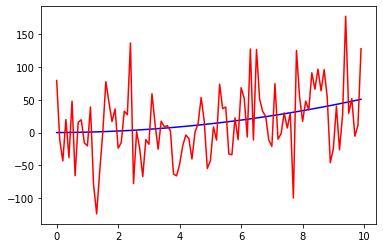

In [ ]:
plt.plot(t, p, c='b')
plt.plot(t, z, c='r')
plt.show()

Построим фильтр Калмана

In [ ]:
p_est = []
v_est = []
x = np.array([[0], [0]])
Sigma = Ex.copy() # начальная ковариация оценки


for i in range(len(t)):
    x_pred = np.matmul(A, x) + B*u
    Sigma_pred = np.matmul(np.matmul(A, Sigma), A.T) #+ Ex
   
    temp = np.matmul(C, Sigma_pred)
    temp = np.matmul(temp, C.T)
    temp = temp + Ez
    temp = np.linalg.inv( temp)
    temp = np.matmul(C.T, temp)
        
    K = np.matmul(Sigma_pred, temp)
    
    x = x_pred + K* ( z[i] - np.matmul(A, x_pred))
    p_est.append(x[0][0])
    v_est.append(x[1][0])
    
    temp = np.eye(2) - np.matmul(K, C)
    Sigma = np.matmul(temp, Sigma_pred)

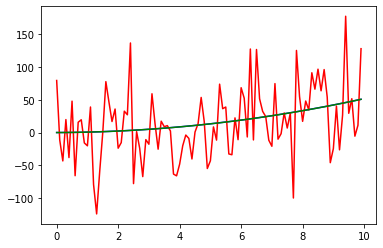

In [ ]:
plt.plot(t, p, c='b')
plt.plot(t, z, c='r')
plt.plot(t, p_est, c='g')
plt.show()

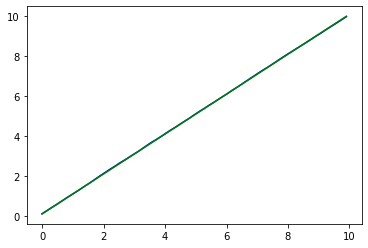

In [ ]:
plt.plot(t, v, c='b')
plt.plot(t, v_est, c='g')
plt.show()

# EKF - фильтр Калана для нелинейных систем

Модель описывается системой нелинейных уравнений

$$
\left\{
\begin{array}{c}
    x_{k} = g(x_{k-1}, u_k) + \varepsilon_x \\
    z_{k} = g(x_k) + \varepsilon_z
\end{array}
\right.
$$

Алгоритм:
    
$$
\begin{array}{l}
Extended\_Kalman\_filter(\hat{x}_{t-1}, \Sigma_{t-1}, u_t, z_t):\\
\quad \bar{x}_t = g(x_{t-1}, u_t)\\
\quad \bar{\Sigma}_t = A\Sigma_{t-1}A^T_t + R_t\\
\\
\quad   K_t = \bar{\Sigma}_tC^T (C\bar{\Sigma}_tC^T + Q_t)^{-1}\\
\quad   \hat{x}(t) = \bar{x}_t + K_t(z_t - h(\bar{x}_t))\\
\quad   \Sigma_t = (I - K_tC)\bar{\Sigma}_t\\
\quad   return \quad \hat{x}_t, \Sigma_t
\end{array}
$$